Global and Local Moran's I computations for Summer Water and DMMP grayscale filter textures.

In [1]:
import pysal
import numpy as np
from pysal.lib.weights import lat2W, higher_order
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
import matplotlib
import seaborn as sns
sns.set(style = "dark")
sns.set_context("talk", font_scale = 1)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['axes.axisbelow'] = True
matplotlib.rcParams.update({'figure.autolayout': True})

C:\Users\adsmith23\AppData\Local\Continuum\anaconda3\lib\site-packages\pysal\lib\weights\util.py:19: UserWarning: geopandas not available. Some functionality will be disabled.
  warn('geopandas not available. Some functionality will be disabled.')
C:\Users\adsmith23\AppData\Local\Continuum\anaconda3\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


Import summed Water and DMMP textures. 

In [2]:
summed_water_texture = np.load('Pickle_Files/Watertexture.npy')
summed_dmmp_texture = np.load('Pickle_Files/DMMPtexture.npy')

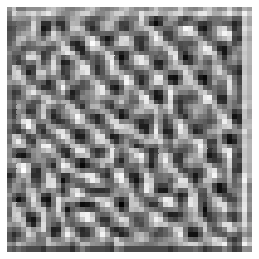

In [3]:

sns.heatmap(summed_water_texture,cmap = sns.color_palette("Greys_r",n_colors = 100),cbar = False,square = True)
plt.axis('off')
plt.savefig("Water_Texture.eps")

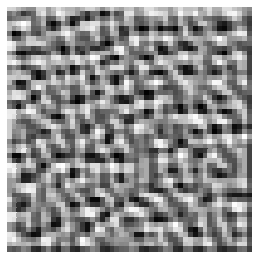

In [4]:
sns.heatmap(summed_dmmp_texture,cmap = sns.color_palette("Greys_r",n_colors = 100),cbar = False,square = True)
plt.axis('off')
plt.savefig("dmmp_Texture.eps")

Computer Global Moran's I value for each texture using Pysal.

In [5]:
w = pysal.lib.weights.lat2W(50,50)
mi_Water = pysal.explore.esda.moran.Moran(summed_water_texture,w)
mi_DMMP = pysal.explore.esda.moran.Moran(summed_dmmp_texture,w)

print("Global Moran's I Value for Water Texture is {}".format(mi_Water.I))
print("Global Moran's I Value for DMMP Texture is {}".format(mi_DMMP.I))

Global Moran's I Value for Water Texture is 0.5412593815702718
Global Moran's I Value for DMMP Texture is 0.48187386247360087


Compute Local Moran's I Values and diplay them.

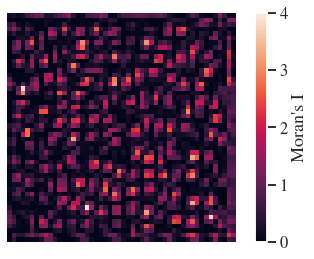

In [6]:
li_Water = pysal.explore.esda.moran.Moran_Local(summed_water_texture,w)

li_DMMP = pysal.explore.esda.moran.Moran_Local(summed_dmmp_texture,w)

g1 = (li_Water.Is)

g2 = (li_DMMP.Is)

plt.figure()
plt.imshow(np.reshape(g1,(50,50)),origin = "lower")
cbar = plt.colorbar()
# plt.title("Local Moran's I Water")
cbar.set_label("Moran's I")
plt.axis('off')
plt.clim([0,4])

plt.savefig("MoransIWater.eps")





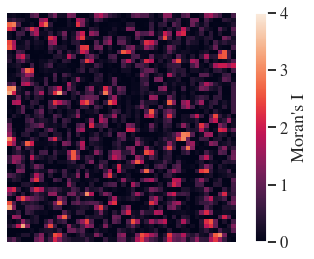

In [7]:
plt.figure()
plt.imshow(np.reshape(g2,(50,50)),origin = "lower")
cbar = plt.colorbar()
# plt.title("Local Moran's I Water")
cbar.set_label("Moran's I")
plt.axis('off')
plt.clim([0,4])

plt.savefig("MoransIDMMP.eps")